LINEAR INTERPOLATION - HW01 TASK 1
GENERATING 100 INTERPOLATED POINTS FROM 10 ORIGINAL POINTS

📂 Reading data from:
   D:\\Physics\\Computational Physics and Astrophysics\\interpolation\\HW01_data.txt

✓ Data loaded successfully!
  Number of original points: 10
  x domain: [-1.0, 8.0]
  y range: [-3.0, 4.0]

────────────────────────Interpolation Process─────────────────────────
  Target resolution: 10x
  Number of points to generate: 100
  Spacing between points: Δx = 0.090909

  Applying linear interpolation formula...
  Formula: y = y₀ + (y₁ - y₀) × (x - x₀) / (x₁ - x₀)

✓ Interpolation completed!
  Generated 100 interpolated y-values
  Total points on chart: 10 original + 100 interpolated

──────────────────────Sample Interpolated Values──────────────────────
  At x =  0.50  →  y =  0.0000
  At x =  1.50  →  y =  2.0000
  At x =  4.00  →  y =  2.0000
  At x =  6.50  →  y =  1.5000

───────────────────────Creating Visualizations────────────────────────

✓ Interpolation plot saved as 

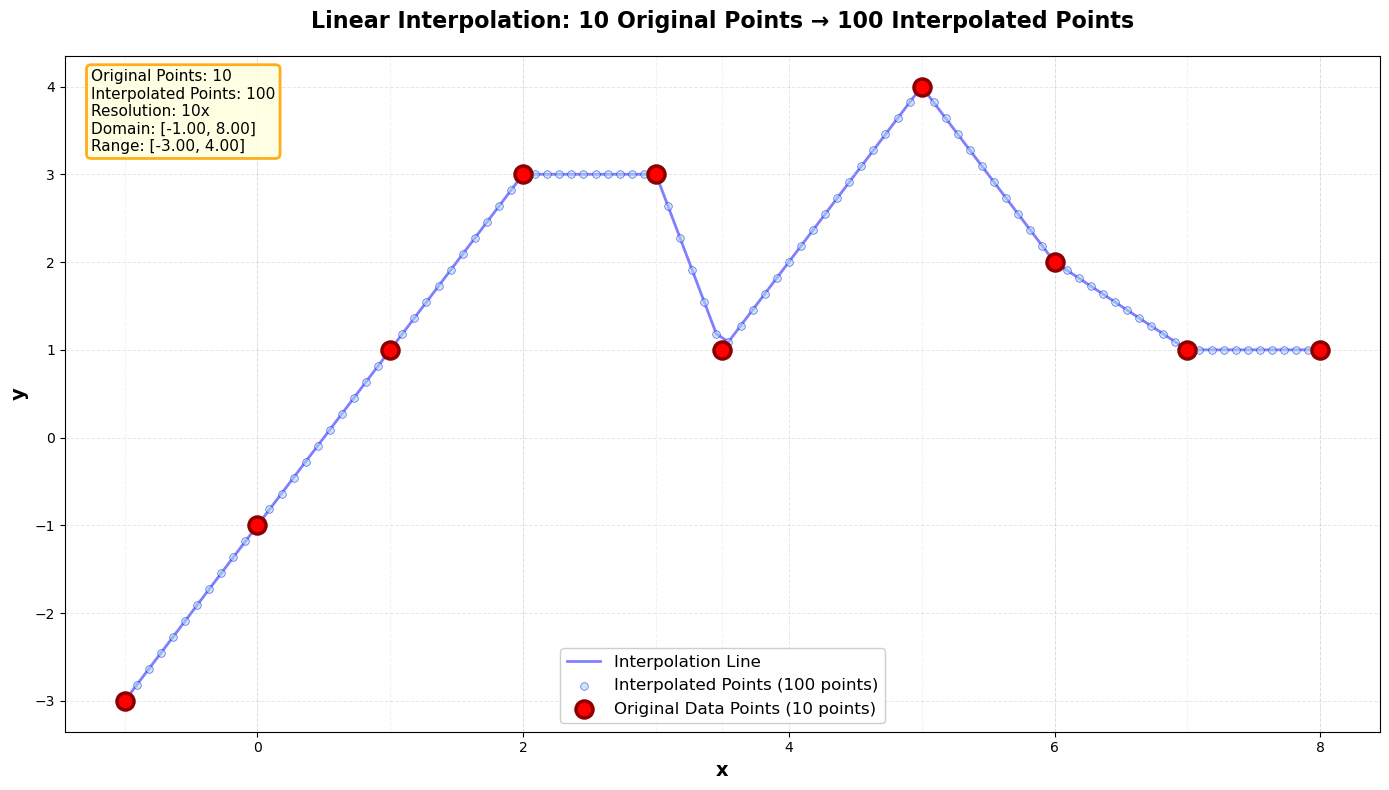

✓ Comparison plot saved as 'D:\\Physics\\Computational Physics and Astrophysics\\interpolation\interpolation_comparison.png'


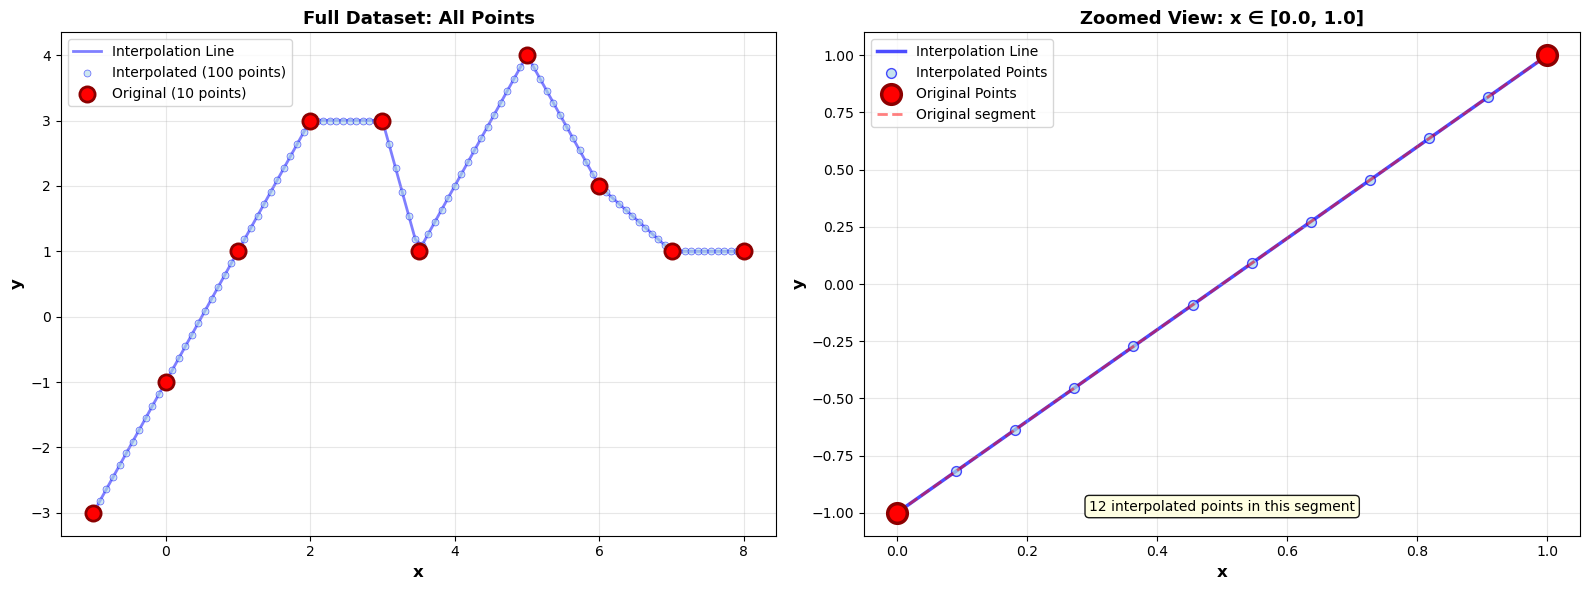


───────────────────────────────Summary────────────────────────────────
  ✓ Original data points: 10
  ✓ Interpolated points: 100
  ✓ Resolution increase: 10x
  ✓ Points per segment: ~11
  ✓ Method: Linear interpolation
  ✓ Plot 1 saved: D:\\Physics\\Computational Physics and Astrophysics\\interpolation\interpolation_result.png
  ✓ Plot 2 saved: D:\\Physics\\Computational Physics and Astrophysics\\interpolation\interpolation_comparison.png

TASK COMPLETED SUCCESSFULLY!

All 100 interpolated points have been generated using the formula:
  y = y₀ + slope × (x - x₀)
where slope = (y₁ - y₀) / (x₁ - x₀)

Each interpolated point lies exactly on the piecewise linear function
defined by the original data points.




In [5]:
"""
Linear Interpolation Implementation for HW01 - Task 1
Author: Solution for Computational Physics Assignment
Date: February 2026

This script implements linear interpolation to generate 100 interpolated points
from 10 original data points, achieving 10x resolution increase.

Features:
  - Reads data from file
  - Generates evenly-spaced interpolated points
  - Creates comprehensive visualizations
  - Shows all interpolated points clearly on plots

File Path: D:/Physics/Computational Physics and Astrophysics/interpolation/HW01_data.txt
"""

import matplotlib.pyplot as plt
import os


# ============================================================================
# INTERPOLATION FUNCTIONS
# ============================================================================

def create_evenly_spaced_points(start, stop, num):
    """
    Generate evenly-spaced numbers over a specified interval.

    Parameters:
    -----------
    start : float
        Starting value
    stop : float
        Ending value
    num : int
        Number of points to generate

    Returns:
    --------
    list : List of evenly-spaced values
    """
    if num < 2:
        return [start]

    step = (stop - start) / (num - 1)
    return [start + step * i for i in range(num)]

def linear_interpolate(x_data, y_data, x_query, extrapolation='constant'):
    """
    Perform linear interpolation on data points.

    Given a set of data points (x_data, y_data), this function calculates
    the interpolated y-values at specified x-positions (x_query) using
    piecewise linear interpolation.

    Parameters:
    -----------
    x_data : list or tuple
        x-coordinates of input data points
    y_data : list or tuple
        y-coordinates of input data points
    x_query : float or list
        x value(s) where interpolation is desired
    extrapolation : str, optional
        How to handle points outside the data range:
        - 'forbid': raise error if outside domain
        - 'constant': use endpoint value
        - 'linear': continue with same slope

    Returns:
    --------
    float or list: Interpolated y value(s)

    Method:
    -------
    For each query point x:
      1. Find the two data points that bracket x
      2. Calculate the slope between these points
      3. Use the linear equation: y = y₀ + slope × (x - x₀)
    """

    # Convert to lists for processing
    x_data = list(x_data)
    y_data = list(y_data)

    # Check if data is sorted, sort if needed
    is_sorted = True
    for i in range(len(x_data) - 1):
        if x_data[i] > x_data[i + 1]:
            is_sorted = False
            break

    if not is_sorted:
        # Sort both lists together based on x values
        pairs = list(zip(x_data, y_data))
        pairs.sort(key=lambda pair: pair[0])
        x_data = [pair[0] for pair in pairs]
        y_data = [pair[1] for pair in pairs]

    # Handle both scalar and list inputs
    if isinstance(x_query, (int, float)):
        scalar_input = True
        x_query = [x_query]
    else:
        scalar_input = False
        x_query = list(x_query)

    # Initialize results
    y_interp = []

    x_min = x_data[0]
    x_max = x_data[-1]

    # Process each query point
    for xq in x_query:
        # Check if outside domain
        if xq < x_min or xq > x_max:
            if extrapolation == 'forbid':
                raise ValueError(
                    f"x_query value {xq} is outside the domain [{x_min}, {x_max}]. "
                    f"Extrapolation is forbidden."
                )
            elif extrapolation == 'constant':
                # Use constant value from nearest endpoint
                if xq < x_min:
                    y_interp.append(y_data[0])
                else:
                    y_interp.append(y_data[-1])
            elif extrapolation == 'linear':
                # Linear extrapolation using slope from nearest segment
                if xq < x_min:
                    slope = (y_data[1] - y_data[0]) / (x_data[1] - x_data[0])
                    y = y_data[0] + slope * (xq - x_data[0])
                    y_interp.append(y)
                else:
                    slope = (y_data[-1] - y_data[-2]) / (x_data[-1] - x_data[-2])
                    y = y_data[-1] + slope * (xq - x_data[-1])
                    y_interp.append(y)
            else:
                raise ValueError(f"Unknown extrapolation method: '{extrapolation}'")
        else:
            # Find bracketing interval
            idx = None
            for i in range(len(x_data)):
                if x_data[i] >= xq:
                    idx = i
                    break

            # Handle exact match or boundary
            if idx is not None and x_data[idx] == xq:
                # Exact match with a data point
                y_interp.append(y_data[idx])
            elif idx == 0 or idx is None:
                # At or before first point
                y_interp.append(y_data[0])
            else:
                # Between two points: apply linear interpolation formula
                x0 = x_data[idx - 1]
                x1 = x_data[idx]
                y0 = y_data[idx - 1]
                y1 = y_data[idx]

                # Linear interpolation: y = y₀ + (y₁ - y₀) × (x - x₀) / (x₁ - x₀)
                slope = (y1 - y0) / (x1 - x0)
                y = y0 + slope * (xq - x0)
                y_interp.append(y)

    # Return scalar if input was scalar, list if input was list
    if scalar_input:
        return y_interp[0]
    else:
        return y_interp

def read_data_file(file_path):
    """Read data from tab-separated text file."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    with open(file_path, 'r') as f:
        lines = f.readlines()

    x_data = []
    y_data = []
    for line in lines[1:]:  # Skip header
        line = line.strip()
        if not line:
            continue
        values = line.split('\t') if '\t' in line else line.split()
        if len(values) >= 2:
            try:
                x_data.append(float(values[0]))
                y_data.append(float(values[1]))
            except ValueError:
                continue

    return x_data, y_data

def create_interpolation_plot(x_original, y_original, x_interp, y_interp, 
                              save_path='interpolation_result.png'):
    """
    Create comprehensive visualization showing original and interpolated points.

    This plot displays:
      - All interpolated points as small blue dots
      - Original data points as large red circles
      - Connecting line through interpolated points
      - Statistical information about the interpolation
    """
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot line connecting all interpolated points
    ax.plot(x_interp, y_interp, 'b-', linewidth=2, alpha=0.5, 
            label='Interpolation Line', zorder=1)

    # Plot all interpolated points as blue dots
    ax.scatter(x_interp, y_interp, color='lightblue', s=30, 
               label=f'Interpolated Points ({len(x_interp)} points)', 
               zorder=2, alpha=0.6, edgecolors='blue', linewidths=0.5)

    # Plot original data points as red circles (on top for visibility)
    ax.scatter(x_original, y_original, color='red', s=150, 
               label=f'Original Data Points ({len(x_original)} points)', 
               zorder=3, edgecolors='darkred', linewidths=2.5, marker='o')

    # Add vertical guide lines at original points
    for i in range(len(x_original)):
        ax.axvline(x=x_original[i], color='gray', alpha=0.1, linestyle='--', linewidth=0.8)

    # Styling
    ax.set_xlabel('x', fontsize=14, fontweight='bold')
    ax.set_ylabel('y', fontsize=14, fontweight='bold')
    ax.set_title(f'Linear Interpolation: {len(x_original)} Original Points → {len(x_interp)} Interpolated Points', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
    ax.legend(loc='best', fontsize=12, framealpha=0.95)

    # Add statistics text box
    x_min_val = min(x_original)
    x_max_val = max(x_original)
    y_min_val = min(y_original)
    y_max_val = max(y_original)

    stats_text = (
        f'Original Points: {len(x_original)}\n'
        f'Interpolated Points: {len(x_interp)}\n'
        f'Resolution: {len(x_interp)//len(x_original)}x\n'
        f'Domain: [{x_min_val:.2f}, {x_max_val:.2f}]\n'
        f'Range: [{y_min_val:.2f}, {y_max_val:.2f}]'
    )
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9, 
                     edgecolor='orange', linewidth=2))

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"\n✓ Interpolation plot saved as '{save_path}'")
    plt.show()

def create_comparison_plot(x_original, y_original, x_interp, y_interp,
                           save_path='interpolation_comparison.png'):
    """
    Create side-by-side comparison showing full view and zoomed detail.

    Left subplot: Full dataset overview
    Right subplot: Zoomed view of one segment showing point distribution
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # LEFT PLOT: Full view
    ax1.plot(x_interp, y_interp, 'b-', linewidth=2, alpha=0.5, 
             label='Interpolation Line', zorder=1)
    ax1.scatter(x_interp, y_interp, color='lightblue', s=25, 
                label=f'Interpolated ({len(x_interp)} points)', 
                zorder=2, alpha=0.6, edgecolors='blue', linewidths=0.5)
    ax1.scatter(x_original, y_original, color='red', s=120, 
                label=f'Original ({len(x_original)} points)', 
                zorder=3, edgecolors='darkred', linewidths=2, marker='o')

    ax1.set_xlabel('x', fontsize=12, fontweight='bold')
    ax1.set_ylabel('y', fontsize=12, fontweight='bold')
    ax1.set_title('Full Dataset: All Points', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)

    # RIGHT PLOT: Zoomed view [0, 1]
    zoom_xmin, zoom_xmax = 0.0, 1.0

    # Filter points in zoom region
    x_zoom_interp = [x_interp[i] for i in range(len(x_interp)) 
                     if zoom_xmin <= x_interp[i] <= zoom_xmax]
    y_zoom_interp = [y_interp[i] for i in range(len(x_interp)) 
                     if zoom_xmin <= x_interp[i] <= zoom_xmax]
    x_zoom_orig = [x_original[i] for i in range(len(x_original)) 
                   if zoom_xmin <= x_original[i] <= zoom_xmax]
    y_zoom_orig = [y_original[i] for i in range(len(x_original)) 
                   if zoom_xmin <= y_original[i] <= zoom_xmax]

    ax2.plot(x_zoom_interp, y_zoom_interp, 'b-', linewidth=2.5, alpha=0.7, 
             label='Interpolation Line', zorder=1)
    ax2.scatter(x_zoom_interp, y_zoom_interp, color='lightblue', s=50, 
                label=f'Interpolated Points', 
                zorder=2, alpha=0.7, edgecolors='blue', linewidths=1)
    ax2.scatter(x_zoom_orig, y_zoom_orig, color='red', s=200, 
                label=f'Original Points', 
                zorder=3, edgecolors='darkred', linewidths=2.5, marker='o')

    # Connect the two original points with dashed line
    if len(x_zoom_orig) >= 2:
        ax2.plot([x_zoom_orig[0], x_zoom_orig[-1]], 
                [y_zoom_orig[0], y_zoom_orig[-1]], 
                'r--', linewidth=2, alpha=0.5, label='Original segment')

    ax2.set_xlabel('x', fontsize=12, fontweight='bold')
    ax2.set_ylabel('y', fontsize=12, fontweight='bold')
    ax2.set_title(f'Zoomed View: x ∈ [{zoom_xmin}, {zoom_xmax}]', 
                  fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=10)

    # Annotation
    n_points_segment = len(x_zoom_interp)
    ax2.text(0.5, 0.05, 
             f'{n_points_segment} interpolated points in this segment',
             transform=ax2.transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9),
             horizontalalignment='center')

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"✓ Comparison plot saved as '{save_path}'")
    plt.show()

def create_comparison_plot(x_original, y_original, x_interp, y_interp,
                           save_path='interpolation_comparison.png'):
    """
    Create side-by-side comparison showing full view and zoomed detail.

    Left subplot: Full dataset overview
    Right subplot: Zoomed view of one segment showing point distribution
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # LEFT PLOT: Full view
    ax1.plot(x_interp, y_interp, 'b-', linewidth=2, alpha=0.5,
             label='Interpolation Line', zorder=1)
    ax1.scatter(x_interp, y_interp, color='lightblue', s=25,
                label=f'Interpolated ({len(x_interp)} points)',
                zorder=2, alpha=0.6, edgecolors='blue', linewidths=0.5)
    ax1.scatter(x_original, y_original, color='red', s=120,
                label=f'Original ({len(x_original)} points)',
                zorder=3, edgecolors='darkred', linewidths=2, marker='o')

    ax1.set_xlabel('x', fontsize=12, fontweight='bold')
    ax1.set_ylabel('y', fontsize=12, fontweight='bold')
    ax1.set_title('Full Dataset: All Points', fontsize=13, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=10)

    # RIGHT PLOT: Zoomed view [0, 1]
    zoom_xmin, zoom_xmax = 0.0, 1.0

    # Filter points in zoom region (use SAME x-based condition for x and y)
    x_zoom_interp = [x_interp[i] for i in range(len(x_interp))
                     if zoom_xmin <= x_interp[i] <= zoom_xmax]
    y_zoom_interp = [y_interp[i] for i in range(len(x_interp))
                     if zoom_xmin <= x_interp[i] <= zoom_xmax]
    x_zoom_orig = [x_original[i] for i in range(len(x_original))
                   if zoom_xmin <= x_original[i] <= zoom_xmax]
    y_zoom_orig = [y_original[i] for i in range(len(x_original))
                   if zoom_xmin <= x_original[i] <= zoom_xmax]

    ax2.plot(x_zoom_interp, y_zoom_interp, 'b-', linewidth=2.5, alpha=0.7,
             label='Interpolation Line', zorder=1)
    ax2.scatter(x_zoom_interp, y_zoom_interp, color='lightblue', s=50,
                label='Interpolated Points',
                zorder=2, alpha=0.7, edgecolors='blue', linewidths=1)
    ax2.scatter(x_zoom_orig, y_zoom_orig, color='red', s=200,
                label='Original Points',
                zorder=3, edgecolors='darkred', linewidths=2.5, marker='o')

    # Connect the two original points with dashed line
    if len(x_zoom_orig) >= 2:
        ax2.plot([x_zoom_orig[0], x_zoom_orig[-1]],
                 [y_zoom_orig[0], y_zoom_orig[-1]],
                 'r--', linewidth=2, alpha=0.5, label='Original segment')

    ax2.set_xlabel('x', fontsize=12, fontweight='bold')
    ax2.set_ylabel('y', fontsize=12, fontweight='bold')
    ax2.set_title(f'Zoomed View: x ∈ [{zoom_xmin}, {zoom_xmax}]',
                  fontsize=13, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=10)

    # Annotation
    n_points_segment = len(x_zoom_interp)
    ax2.text(0.5, 0.05,
             f'{n_points_segment} interpolated points in this segment',
             transform=ax2.transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9),
             horizontalalignment='center')

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"✓ Comparison plot saved as '{save_path}'")
    plt.show()


def main():
    """
    Main execution function.

    Process:
    1. Read original data (10 points from file)
    2. Generate 100 evenly-spaced x-values across the domain
    3. Calculate corresponding y-values using linear interpolation
    4. Create visualizations showing all points
    """

    file_path = r'D:\\Physics\\Computational Physics and Astrophysics\\interpolation\\HW01_data.txt'

    print("="*70)
    print("LINEAR INTERPOLATION - HW01 TASK 1")
    print("GENERATING 100 INTERPOLATED POINTS FROM 10 ORIGINAL POINTS")
    print("="*70)

    # Read original data
    print(f"\n📂 Reading data from:\n   {file_path}")

    try:
        x_original, y_original = read_data_file(file_path)
    except FileNotFoundError as e:
        print(f"\n❌ Error: {e}")
        return

    print(f"\n✓ Data loaded successfully!")
    print(f"  Number of original points: {len(x_original)}")
    print(f"  x domain: [{min(x_original)}, {max(x_original)}]")
    print(f"  y range: [{min(y_original)}, {max(y_original)}]")

    # Calculate parameters for interpolation
    n_original = len(x_original)
    resolution_multiplier = 10
    n_interpolated = n_original * resolution_multiplier

    print(f"\n{'Interpolation Process':─^70}")
    print(f"  Target resolution: {resolution_multiplier}x")
    print(f"  Number of points to generate: {n_interpolated}")

    # Step 1: Generate evenly-spaced x-values
    x_interp = create_evenly_spaced_points(min(x_original), max(x_original), n_interpolated)
    spacing = (max(x_original) - min(x_original)) / (n_interpolated - 1)
    print(f"  Spacing between points: Δx = {spacing:.6f}")

    # Step 2: Calculate y-values using linear interpolation
    print(f"\n  Applying linear interpolation formula...")
    print(f"  Formula: y = y₀ + (y₁ - y₀) × (x - x₀) / (x₁ - x₀)")

    y_interp = linear_interpolate(x_original, y_original, x_interp, 
                                  extrapolation='constant')

    print(f"\n✓ Interpolation completed!")
    print(f"  Generated {len(y_interp)} interpolated y-values")
    print(f"  Total points on chart: {len(x_original)} original + {len(x_interp)} interpolated")

    # Test specific values
    print(f"\n{'Sample Interpolated Values':─^70}")
    test_x = [0.5, 1.5, 4.0, 6.5]
    for tx in test_x:
        ty = linear_interpolate(x_original, y_original, tx, extrapolation='constant')
        print(f"  At x = {tx:5.2f}  →  y = {ty:7.4f}")

    # Create visualizations
    print(f"\n{'Creating Visualizations':─^70}")
    output_dir = os.path.dirname(file_path)

    save_path1 = os.path.join(output_dir, 'interpolation_result.png')
    create_interpolation_plot(x_original, y_original, x_interp, y_interp, save_path1)

    save_path2 = os.path.join(output_dir, 'interpolation_comparison.png')
    create_comparison_plot(x_original, y_original, x_interp, y_interp, save_path2)

    print(f"\n{'Summary':─^70}")
    print(f"  ✓ Original data points: {len(x_original)}")
    print(f"  ✓ Interpolated points: {len(x_interp)}")
    print(f"  ✓ Resolution increase: {len(x_interp)//len(x_original)}x")
    print(f"  ✓ Points per segment: ~{len(x_interp)//len(x_original)+1}")
    print(f"  ✓ Method: Linear interpolation")
    print(f"  ✓ Plot 1 saved: {save_path1}")
    print(f"  ✓ Plot 2 saved: {save_path2}")

    print("\n" + "="*70)
    print("TASK COMPLETED SUCCESSFULLY!")
    print("="*70)
    print("\nAll 100 interpolated points have been generated using the formula:")
    print("  y = y₀ + slope × (x - x₀)")
    print("where slope = (y₁ - y₀) / (x₁ - x₀)")
    print("\nEach interpolated point lies exactly on the piecewise linear function")
    print("defined by the original data points.")
    print("\n" + "="*70 + "\n")


if __name__ == "__main__":
    main()
